In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [3]:
first = pd.read_csv('./data/aw_fb_data.csv')

In [4]:
second = pd.read_csv('./data/data_for_weka_aw.csv')

In [5]:
third = pd.read_csv('./data/data_for_weka_fb.csv')

### Participants completed a 65-minute protocol with 40-minutes of total treadmill time and 25-minutes of sitting or lying time. Indirect calorimetry was used to measure energy expenditure

In [6]:
first.head()

Unnamed: 0  X1  age  gender  height  weight      steps  hear_rate  \
0           1   1   20       1   168.0    65.4  10.771429  78.531302   
1           2   2   20       1   168.0    65.4  11.475325  78.453390   
2           3   3   20       1   168.0    65.4  12.179221  78.540825   
3           4   4   20       1   168.0    65.4  12.883117  78.628260   
4           5   5   20       1   168.0    65.4  13.587013  78.715695   

    calories  distance  entropy_heart  entropy_setps  resting_heart  \
0   0.344533  0.008327       6.221612       6.116349           59.0   
1   3.287625  0.008896       6.221612       6.116349           59.0   
2   9.484000  0.009466       6.221612       6.116349           59.0   
3  10.154556  0.010035       6.221612       6.116349           59.0   
4  10.825111  0.010605       6.221612       6.116349           59.0   

   corr_heart_steps  norm_heart  intensity_karvonen  sd_norm_heart  \
0          1.000000   19.531302            0.138520       1.000000   
1          1.000000   19.453390            0.137967       1.000000   
2          1.000000   19.540825            0.138587       1.000000   
3          1.000000   19.628260            0.139208       1.000000   
4          0.982816   19.715695            0.139828       0.241567   

   steps_times_distance       device activity  
0              0.089692  apple watch    Lying  
1              0.102088  apple watch    Lying  
2              0.115287  apple watch    Lying  
3              0.129286  apple watch    Lying  
4              0.144088  apple watch    Lying

In [7]:
second.head()

Unnamed: 0  age  gender  height  weight  Applewatch.Steps_LE  \
0           1   20       1   168.0    65.4            10.771429   
1           2   20       1   168.0    65.4            11.475325   
2           3   20       1   168.0    65.4            12.179221   
3           4   20       1   168.0    65.4            12.883117   
4           5   20       1   168.0    65.4            13.587013   

   Applewatch.Heart_LE  Applewatch.Calories_LE  Applewatch.Distance_LE  \
0            78.531302                0.344533                0.008327   
1            78.453390                3.287625                0.008896   
2            78.540825                9.484000                0.009466   
3            78.628260               10.154556                0.010035   
4            78.715695               10.825111                0.010605   

   EntropyApplewatchHeartPerDay_LE  EntropyApplewatchStepsPerDay_LE  \
0                         6.221612                         6.116349   
1                         6.221612                         6.116349   
2                         6.221612                         6.116349   
3                         6.221612                         6.116349   
4                         6.221612                         6.116349   

   RestingApplewatchHeartrate_LE  CorrelationApplewatchHeartrateSteps_LE  \
0                           59.0                                1.000000   
1                           59.0                                1.000000   
2                           59.0                                1.000000   
3                           59.0                                1.000000   
4                           59.0                                0.982816   

   NormalizedApplewatchHeartrate_LE  ApplewatchIntensity_LE  \
0                         19.531302                0.138520   
1                         19.453390                0.137967   
2                         19.540825                0.138587   
3                         19.628260                0.139208   
4                         19.715695                0.139828   

   SDNormalizedApplewatchHR_LE  ApplewatchStepsXDistance_LE activity_trimmed  
0                     1.000000                     0.089692            Lying  
1                     1.000000                     0.102088            Lying  
2                     1.000000                     0.115287            Lying  
3                     1.000000                     0.129286            Lying  
4                     0.241567                     0.144088            Lying

In [8]:
third.head()

Unnamed: 0  age  gender  height  weight  Fitbit.Steps_LE  Fitbit.Heart_LE  \
0           1   20       1   168.0    65.4              1.0       132.000000   
1           2   20       1   168.0    65.4              1.0       132.777778   
2           3   20       1   168.0    65.4              1.0       129.888889   
3           4   20       1   168.0    65.4              1.0       129.142857   
4          11   20       1   168.0    65.4              1.0       134.555556   

   Fitbit.Calories_LE  Fitbit.Distance_LE  EntropyFitbitHeartPerDay_LE  \
0                 1.0                 1.0                     5.938588   
1                 1.0                 1.0                     5.938588   
2                 1.0                 1.0                     5.938588   
3                 1.0                 1.0                     5.938588   
4                 3.5                 1.0                     5.938588   

   EntropyFitbitStepsPerDay_LE  RestingFitbitHeartrate_LE  \
0                     2.179799                 130.428571   
1                     2.179799                 130.428571   
2                     2.179799                 130.428571   
3                     2.179799                 130.428571   
4                     2.179799                 130.428571   

   CorrelationFitbitHeartrateSteps_LE  NormalizedFitbitHeartrate_LE  \
0                            1.000000                      1.571429   
1                            1.000000                      2.349206   
2                            1.000000                     -0.539683   
3                            1.000000                     -1.285714   
4                           -0.493589                      4.126984   

   FitbitIntensity_LE  SDNormalizedFitbitHR_LE  FitbitStepsXDistance_LE  \
0            0.022587                 1.000000                      1.0   
1            0.033767                 1.000000                      1.0   
2           -0.007757                 1.000000                      1.0   
3           -0.018480                 1.000000                      1.0   
4            0.059320                 1.368007                      1.0   

  activity_trimmed  
0            Lying  
1            Lying  
2            Lying  
3            Lying  
4   Self Pace walk

In [9]:
first.shape

(6264, 20)

## Clean


In [10]:
first.isnull().sum()

Unnamed: 0              0
X1                      0
age                     0
gender                  0
height                  0
weight                  0
steps                   0
hear_rate               0
calories                0
distance                0
entropy_heart           0
entropy_setps           0
resting_heart           0
corr_heart_steps        0
norm_heart              0
intensity_karvonen      0
sd_norm_heart           0
steps_times_distance    0
device                  0
activity                0
dtype: int64

In [11]:
first = first.drop(columns=['Unnamed: 0'])

In [12]:
first.head()

X1  age  gender  height  weight      steps  hear_rate   calories  distance  \
0   1   20       1   168.0    65.4  10.771429  78.531302   0.344533  0.008327   
1   2   20       1   168.0    65.4  11.475325  78.453390   3.287625  0.008896   
2   3   20       1   168.0    65.4  12.179221  78.540825   9.484000  0.009466   
3   4   20       1   168.0    65.4  12.883117  78.628260  10.154556  0.010035   
4   5   20       1   168.0    65.4  13.587013  78.715695  10.825111  0.010605   

   entropy_heart  entropy_setps  resting_heart  corr_heart_steps  norm_heart  \
0       6.221612       6.116349           59.0          1.000000   19.531302   
1       6.221612       6.116349           59.0          1.000000   19.453390   
2       6.221612       6.116349           59.0          1.000000   19.540825   
3       6.221612       6.116349           59.0          1.000000   19.628260   
4       6.221612       6.116349           59.0          0.982816   19.715695   

   intensity_karvonen  sd_norm_heart  steps_times_distance       device  \
0            0.138520       1.000000              0.089692  apple watch   
1            0.137967       1.000000              0.102088  apple watch   
2            0.138587       1.000000              0.115287  apple watch   
3            0.139208       1.000000              0.129286  apple watch   
4            0.139828       0.241567              0.144088  apple watch   

  activity  
0    Lying  
1    Lying  
2    Lying  
3    Lying  
4    Lying

In [13]:
# 0 is Female and 1 is Male 

# EDA

In [14]:
# Convert weight from kilograms to pounds 
first['weight_pounds'] = first['weight'] * 2.20462

In [15]:
# Convert height from cm to inches 
first['height_inches'] = first['height'] * 0.393701

In [16]:
first['bmi'] = (first['weight_pounds'] * 703) / (first['height_inches'] ** 2)

In [17]:
first['bmi'].describe()

count    6264.000000
mean       24.039690
std         3.271466
min        15.792708
25%        22.338035
50%        23.527984
75%        25.739582
max        34.336158
Name: bmi, dtype: float64

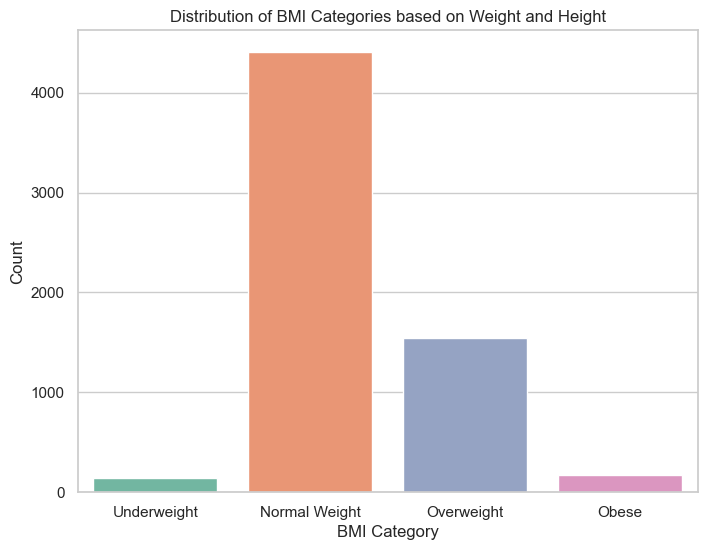

In [18]:
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 24.9:
        return 'Normal Weight'
    elif 25 <= bmi < 29.9:
        return 'Overweight'
    else:
        return 'Obese'

first['bmi category'] = first['bmi'].apply(categorize_bmi)

bmi_categories = ['Underweight', 'Normal Weight', 'Overweight', 'Obese']

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(data=first, x='bmi category', order=bmi_categories, palette="Set2")

plt.xlabel('BMI Category')
plt.ylabel('Count')
plt.title('Distribution of BMI Categories based on Weight and Height')

plt.show()

In [19]:
#Rob is Anal 

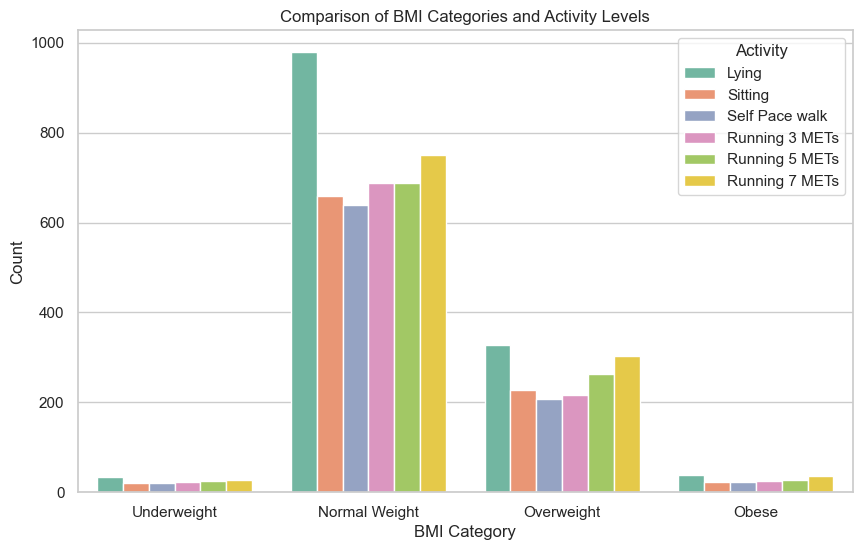

In [20]:
bmi_order = ['Underweight', 'Normal Weight', 'Overweight', 'Obese']
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(data=first, x='bmi category', hue='activity', palette="Set2", order=bmi_order)

plt.xlabel('BMI Category')
plt.ylabel('Count')
plt.title('Comparison of BMI Categories and Activity Levels')

plt.legend(title='Activity')
plt.show()

In [21]:
def calculate_bmr(row):
    if row['gender'] == 1:
        bmr = 10 * row['weight_pounds'] + 6.25 * row['height_inches'] - 5 * row['age'] + 5
    else:
        bmr = 10 * row['weight_pounds'] + 6.25 * row['height_inches'] - 5 * row['age'] - 161
    return bmr

first['bmr'] = first.apply(calculate_bmr, axis=1)

print(first)

        X1  age  gender  height  weight      steps  hear_rate   calories  \
0        1   20       1   168.0    65.4  10.771429  78.531302   0.344533   
1        2   20       1   168.0    65.4  11.475325  78.453390   3.287625   
2        3   20       1   168.0    65.4  12.179221  78.540825   9.484000   
3        4   20       1   168.0    65.4  12.883117  78.628260  10.154556   
4        5   20       1   168.0    65.4  13.587013  78.715695  10.825111   
...    ...  ...     ...     ...     ...        ...        ...        ...   
6259  3666   46       0   157.5    71.4   1.000000  35.000000  20.500000   
6260  3667   46       0   157.5    71.4   1.000000  35.000000  20.500000   
6261  3668   46       0   157.5    71.4   1.000000  35.000000  20.500000   
6262  3669   46       0   157.5    71.4   1.000000  35.000000  20.500000   
6263  3670   46       0   157.5    71.4   1.000000  35.000000  20.500000   

      distance  entropy_heart  ...  intensity_karvonen  sd_norm_heart  \
0     0.008327

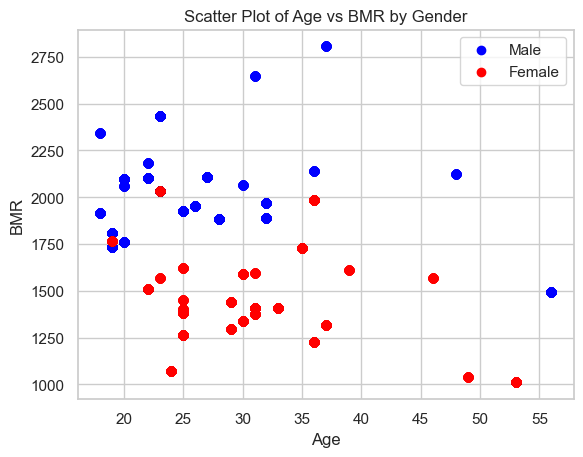

In [22]:
male_data = first[first['gender'] == 1]
female_data = first[first['gender'] == 0]

plt.scatter(male_data['age'], male_data['bmr'], color='blue', label='Male')
plt.scatter(female_data['age'], female_data['bmr'], color='red', label='Female')

plt.title('Scatter Plot of Age vs BMR by Gender')
plt.xlabel('Age')
plt.ylabel('BMR')
plt.legend()
plt.grid(True)
plt.show()

In [23]:
grouped_data = first.groupby('gender').agg({'height': 'mean', 'weight': 'mean'})

print(grouped_data)

            height     weight
gender                       
0       162.460781  62.165233
1       177.671223  77.797387


In [24]:
first.describe().transpose()

count         mean          std          min  \
X1                    6264.0  1771.144317  1097.988748     1.000000   
age                   6264.0    29.158525     8.908978    18.000000   
gender                6264.0     0.476533     0.499489     0.000000   
height                6264.0   169.709052    10.324698   143.000000   
weight                6264.0    69.614464    13.451878    43.000000   
steps                 6264.0   109.562268   222.797908     1.000000   
hear_rate             6264.0    86.142331    28.648385     2.222222   
calories              6264.0    19.471823    27.309765     0.056269   
distance              6264.0    13.832555    45.941437     0.000440   
entropy_heart         6264.0     6.030314     0.765574     0.000000   
entropy_setps         6264.0     5.739984     1.256348     0.000000   
resting_heart         6264.0    65.869938    21.203017     3.000000   
corr_heart_steps      6264.0     0.306447     0.775418    -1.000000   
norm_heart            6264.0    20.272393    28.388116   -76.000000   
intensity_karvonen    6264.0     0.155479     0.210927    -2.714286   
sd_norm_heart         6264.0     8.110854    12.535080     0.000000   
steps_times_distance  6264.0   590.035239  4063.838530     0.000690   
weight_pounds         6264.0   153.473439    29.656280    94.798660   
height_inches         6264.0    66.814623     4.064844    56.299243   
bmi                   6264.0    24.039690     3.271466    15.792708   
bmr                   6264.0  1724.637565   382.742973  1010.543309   

                              25%          50%          75%           max  
X1                     789.750000  1720.000000  2759.250000   3670.000000  
age                     23.000000    28.000000    33.000000     56.000000  
gender                   0.000000     0.000000     1.000000      1.000000  
height                 160.000000   168.000000   180.000000    191.000000  
weight                  60.000000    68.000000    77.300000    115.000000  
steps                    5.159534    10.092029   105.847222   1714.000000  
hear_rate               75.598079    77.267680    95.669118    194.333333  
calories                 0.735875     4.000000    20.500000     97.500000  
distance                 0.019135     0.181719    15.697188    335.000000  
entropy_heart            6.108524     6.189825     6.247928      6.475733  
entropy_setps            5.909440     6.157197     6.247928      6.475733  
resting_heart           58.134333    75.000000    76.138701    155.000000  
corr_heart_steps        -0.467303     0.665829     1.000000      1.000000  
norm_heart               1.148883     9.820254    27.077336    156.319444  
intensity_karvonen       0.009819     0.079529     0.211868      1.297980  
sd_norm_heart            0.264722     2.893503     9.679672     74.457929  
steps_times_distance     0.659260    13.368619    93.728562  51520.000000  
weight_pounds          132.277200   149.914160   170.417126    253.531300  
height_inches           62.992160    66.141768    70.866180     75.196891  
bmi                     22.338035    23.527984    25.739582     34.336158  
bmr                   1410.315525  1735.210365  1987.020255   2805.608519

In [25]:
first.shape

(6264, 24)

In [26]:
first.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6264 entries, 0 to 6263
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   X1                    6264 non-null   int64  
 1   age                   6264 non-null   int64  
 2   gender                6264 non-null   int64  
 3   height                6264 non-null   float64
 4   weight                6264 non-null   float64
 5   steps                 6264 non-null   float64
 6   hear_rate             6264 non-null   float64
 7   calories              6264 non-null   float64
 8   distance              6264 non-null   float64
 9   entropy_heart         6264 non-null   float64
 10  entropy_setps         6264 non-null   float64
 11  resting_heart         6264 non-null   float64
 12  corr_heart_steps      6264 non-null   float64
 13  norm_heart            6264 non-null   float64
 14  intensity_karvonen    6264 non-null   float64
 15  sd_norm_heart        

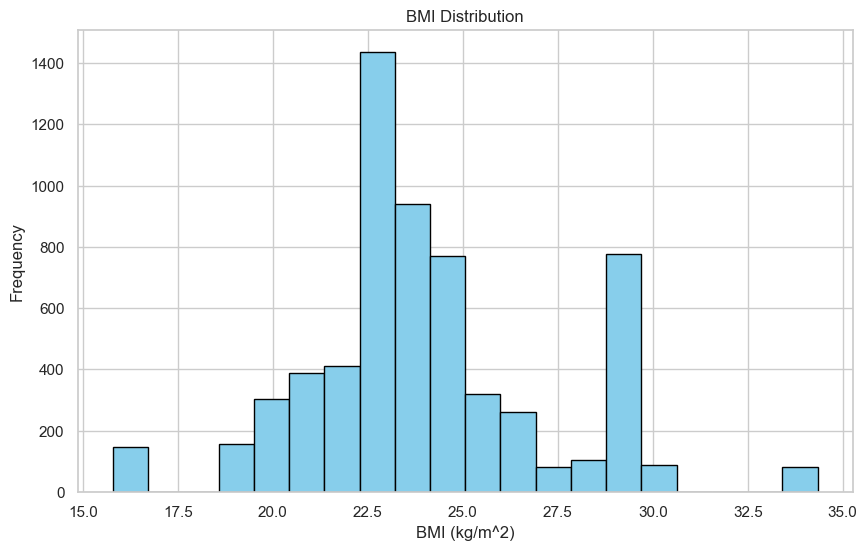

In [27]:
plt.figure(figsize=(10, 6))
plt.hist(first['bmi'], bins=20, color='skyblue', edgecolor='black')
plt.title('BMI Distribution')
plt.xlabel('BMI (kg/m^2)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

<Axes: xlabel='age', ylabel='Count'>

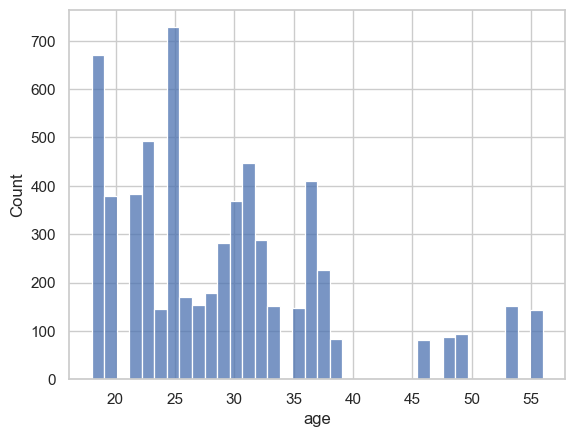

In [28]:
sns.histplot(first['age'])

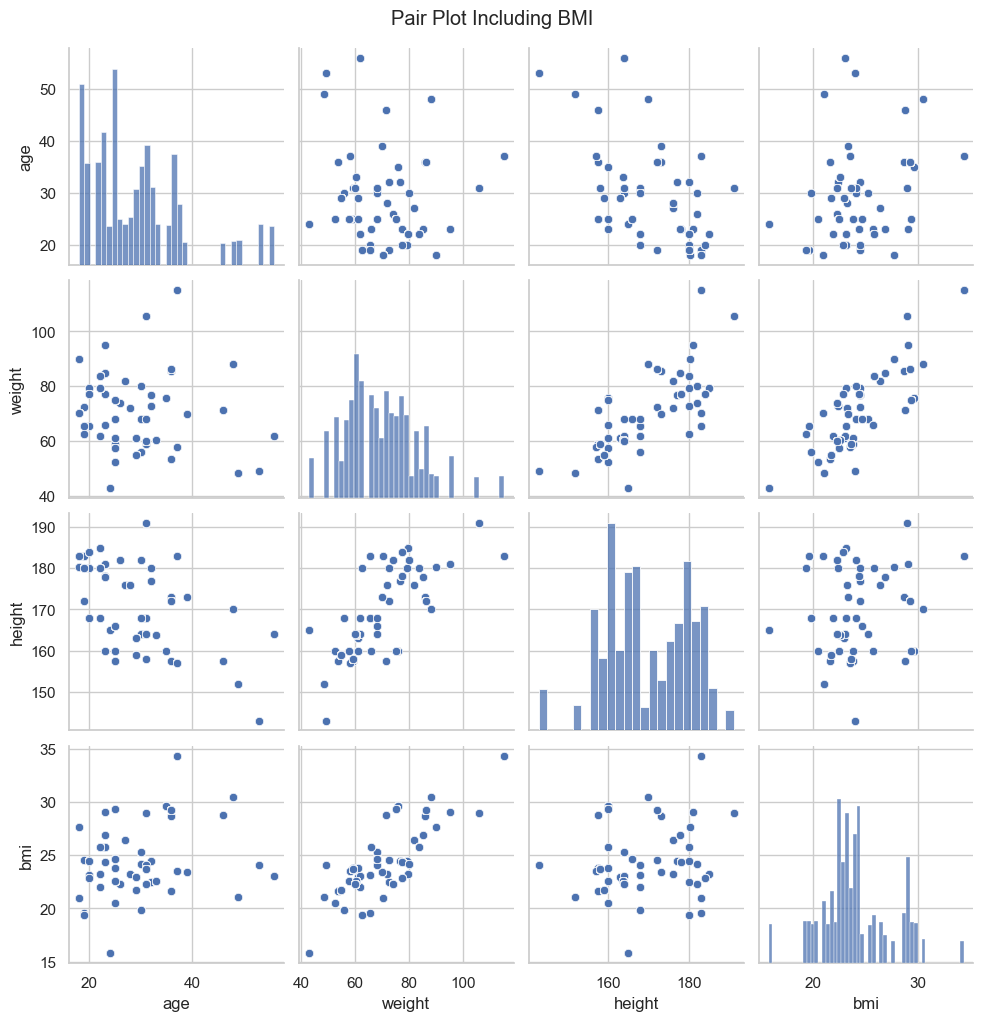

In [29]:
sns.pairplot(data=first, vars=['age', 'weight', 'height', 'bmi'])
plt.suptitle('Pair Plot Including BMI', y=1.02)
plt.show()

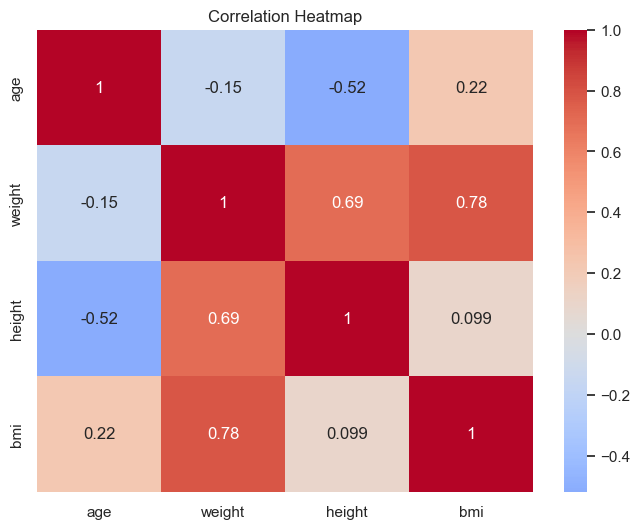

In [30]:
correlation_matrix = first[['age', 'weight', 'height', 'bmi']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

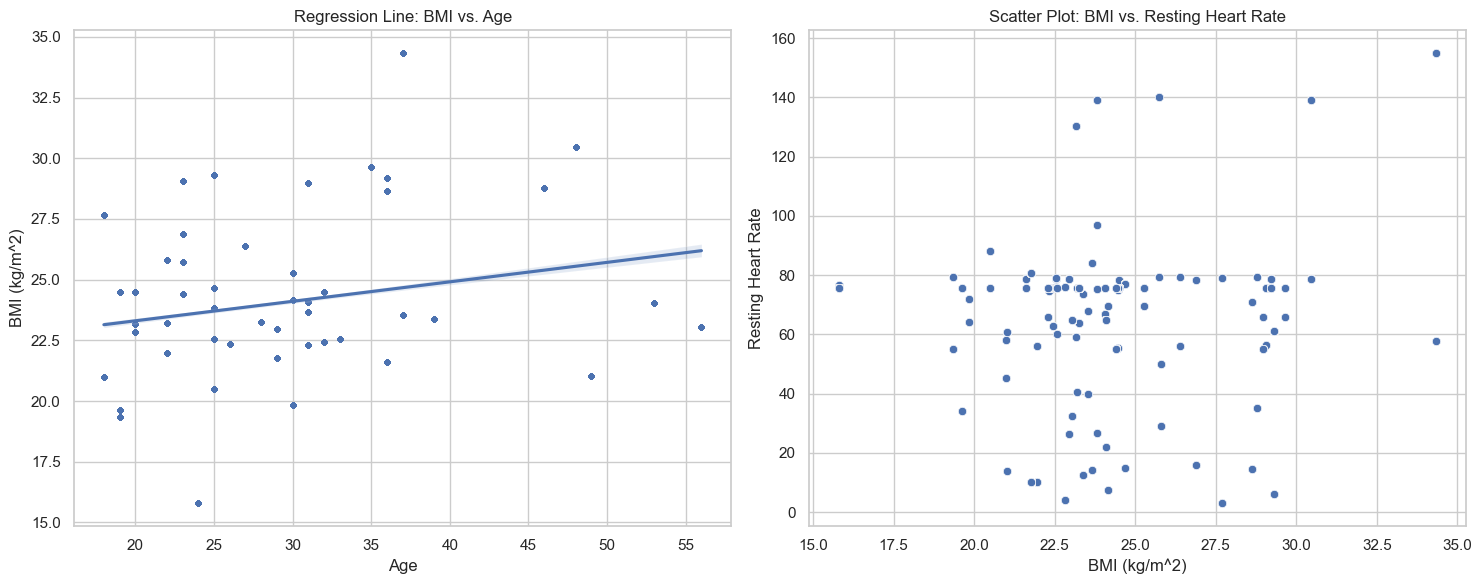

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Regression Line - BMI vs. Age
sns.regplot(data=first, x='age', y='bmi', scatter_kws={'s': 10}, ax=axes[0])
axes[0].set_title('Regression Line: BMI vs. Age')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('BMI (kg/m^2)')

# Scatter Plot - BMI vs. Resting Heart Rate
sns.scatterplot(data=first, x='bmi', y='resting_heart', ax=axes[1])
axes[1].set_title('Scatter Plot: BMI vs. Resting Heart Rate')
axes[1].set_xlabel('BMI (kg/m^2)')
axes[1].set_ylabel('Resting Heart Rate')

plt.tight_layout()
plt.show()

In [32]:
first.device.value_counts()

device
apple watch    3656
fitbit         2608
Name: count, dtype: int64

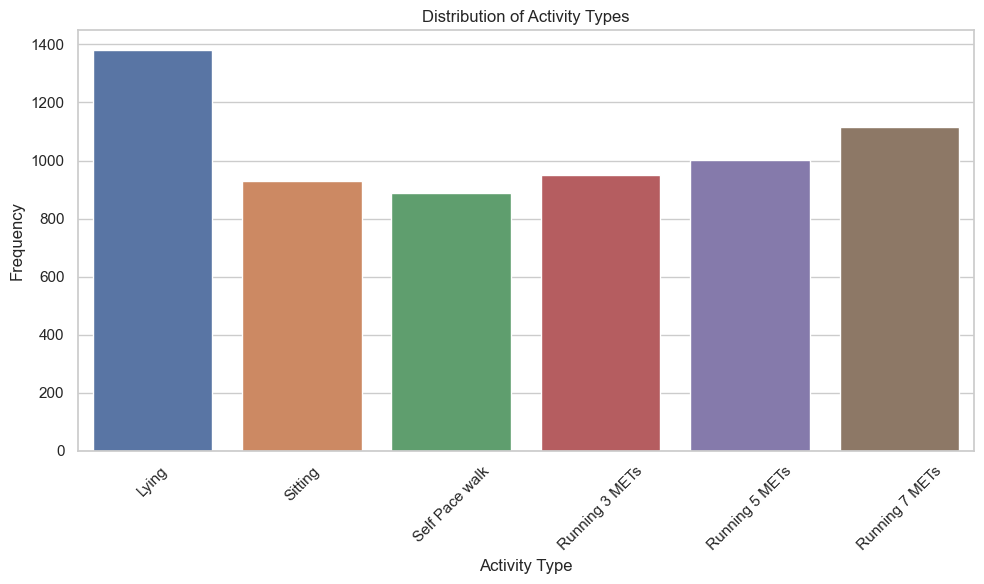

In [33]:
plt.figure(figsize=(10, 6))
sns.countplot(data=first, x='activity')
plt.title('Distribution of Activity Types')
plt.xlabel('Activity Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

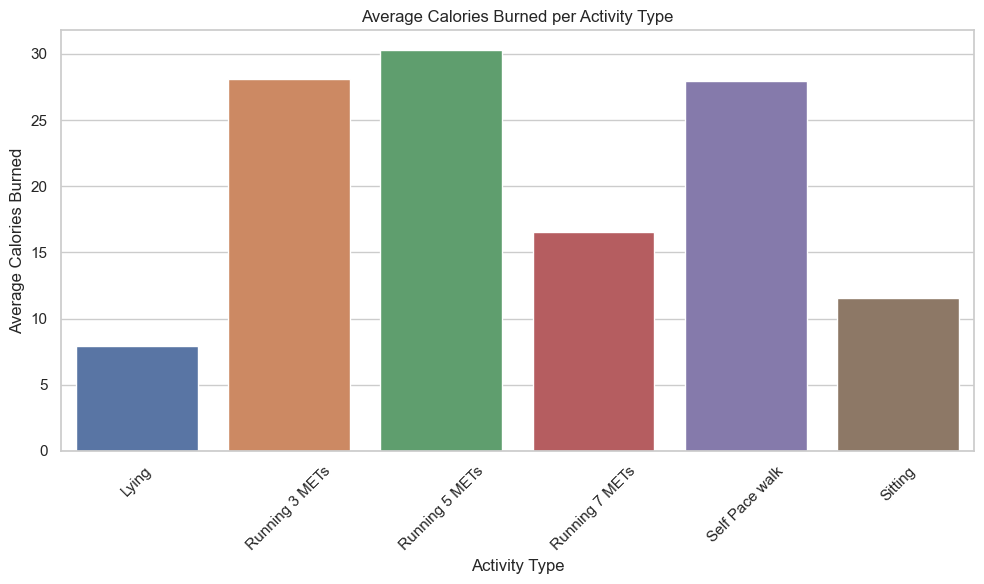

In [34]:
average_calories = first.groupby('activity')['calories'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=average_calories, x='activity', y='calories')
plt.title('Average Calories Burned per Activity Type')
plt.xlabel('Activity Type')
plt.ylabel('Average Calories Burned')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

In [35]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px

/var/folders/gz/cvs186n92z9_zs5h7yb_r5hw0000gn/T/ipykernel_39847/251688514.py:2: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
/var/folders/gz/cvs186n92z9_zs5h7yb_r5hw0000gn/T/ipykernel_39847/251688514.py:3: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


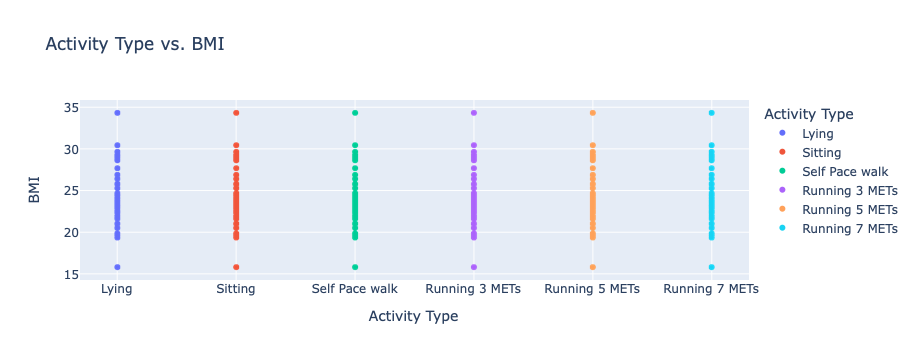

In [36]:
fig = px.scatter(first, x='activity', y='bmi', color='activity',
                 labels={'activity': 'Activity Type', 'bmi': 'BMI'},
                 title='Activity Type vs. BMI',
                 hover_name='activity')

# interactive plot
fig.show()

In [37]:
first.head()

X1  age  gender  height  weight      steps  hear_rate   calories  distance  \
0   1   20       1   168.0    65.4  10.771429  78.531302   0.344533  0.008327   
1   2   20       1   168.0    65.4  11.475325  78.453390   3.287625  0.008896   
2   3   20       1   168.0    65.4  12.179221  78.540825   9.484000  0.009466   
3   4   20       1   168.0    65.4  12.883117  78.628260  10.154556  0.010035   
4   5   20       1   168.0    65.4  13.587013  78.715695  10.825111  0.010605   

   entropy_heart  ...  intensity_karvonen  sd_norm_heart  \
0       6.221612  ...            0.138520       1.000000   
1       6.221612  ...            0.137967       1.000000   
2       6.221612  ...            0.138587       1.000000   
3       6.221612  ...            0.139208       1.000000   
4       6.221612  ...            0.139828       0.241567   

   steps_times_distance       device  activity  weight_pounds  height_inches  \
0              0.089692  apple watch     Lying     144.182148      66.141768   
1              0.102088  apple watch     Lying     144.182148      66.141768   
2              0.115287  apple watch     Lying     144.182148      66.141768   
3              0.129286  apple watch     Lying     144.182148      66.141768   
4              0.144088  apple watch     Lying     144.182148      66.141768   

         bmi   bmi category         bmr  
0  23.169423  Normal Weight  1760.20753  
1  23.169423  Normal Weight  1760.20753  
2  23.169423  Normal Weight  1760.20753  
3  23.169423  Normal Weight  1760.20753  
4  23.169423  Normal Weight  1760.20753  

[5 rows x 24 columns]

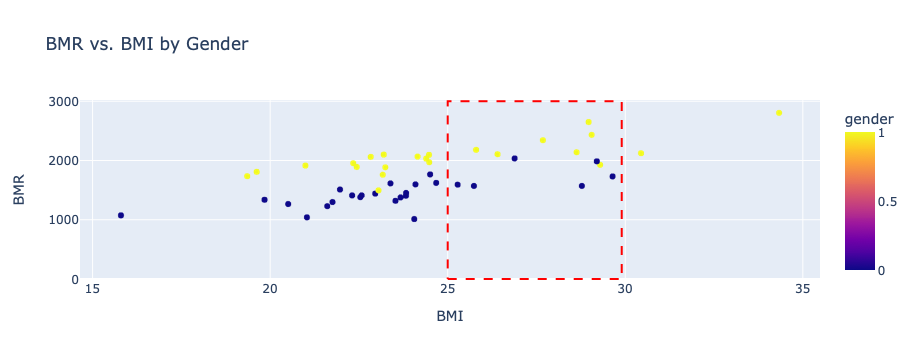

In [38]:
overweight_bmi_min = 25
overweight_bmi_max = 29.9

fig = px.scatter(first, x="bmi", y="bmr", color="gender", title="BMR vs. BMI by Gender")
fig.update_layout(
    xaxis_title="BMI",
    yaxis_title="BMR",
    legend_title="Gender"
)

fig.add_shape(
    type="rect",
    x0=overweight_bmi_min, y0=0,
    x1=overweight_bmi_max, y1=3000,  
    line=dict(color="red", width=2, dash="dash"),
)

fig.show()

### The shape is a dashed red rectangle that spans from overweight_bmi_min to overweight_bmi_max on the x-axis shows are target audience for recommender system. You can highlight over the graph to see the proportion of 0 is Female and 1 is Male 

In [90]:
fitness = first = pd.read_csv('./data/exercise_dataset.csv')

In [53]:
fitness.head()

Activity, Exercise or Sport (1 hour)  130 lb  155 lb  180 lb  205 lb  \
0          Cycling, mountain bike, bmx     502     598     695     791   
1  Cycling, <10 mph, leisure bicycling     236     281     327     372   
2             Cycling, >20 mph, racing     944    1126    1308    1489   
3          Cycling, 10-11.9 mph, light     354     422     490     558   
4       Cycling, 12-13.9 mph, moderate     472     563     654     745   

   Calories per kg  
0         1.750730  
1         0.823236  
2         3.294974  
3         1.234853  
4         1.647825

In [91]:
exercise_categories_to_keep = [
    'Cycling, 12-13.9 mph, moderate',
    'Weight lifting, body building, vigorous',
    'Weight lifting, light workout',
    'Calisthenics, vigorous, pushups, situps',
    'Calisthenics, light',
    'Running, general',
    'Jumping rope, moderate',
    'Walking 3.0 mph, moderate',
    'Swimming leisurely, not laps',
    'Tai chi',
    'Backpacking, Hiking with pack',
    'Aerobics, general',
    'Stretching, hatha yoga',
    'Rowing machine, moderate',
    'Stair machine',
    'Jazzercise'
]

fitness = fitness[fitness['Activity, Exercise or Sport (1 hour)'].isin(exercise_categories_to_keep)]

print(fitness.head())

       Activity, Exercise or Sport (1 hour)  130 lb  155 lb  180 lb  205 lb  \
4            Cycling, 12-13.9 mph, moderate     472     563     654     745   
14                      Calisthenics, light     207     246     286     326   
16  Weight lifting, body building, vigorous     354     422     490     558   
17            Weight lifting, light workout     177     211     245     279   
19                            Stair machine     531     633     735     838   

    Calories per kg  
4          1.647825  
14         0.721008  
16         1.234853  
17         0.617427  
19         1.852957  


In [92]:
fitness.head(20)

Activity, Exercise or Sport (1 hour)  130 lb  155 lb  180 lb  205 lb  \
4             Cycling, 12-13.9 mph, moderate     472     563     654     745   
14                       Calisthenics, light     207     246     286     326   
16   Weight lifting, body building, vigorous     354     422     490     558   
17             Weight lifting, light workout     177     211     245     279   
19                             Stair machine     531     633     735     838   
21                  Rowing machine, moderate     413     493     572     651   
28                         Aerobics, general     384     457     531     605   
29                                Jazzercise     354     422     490     558   
30                    Stretching, hatha yoga     236     281     327     372   
49                          Running, general     472     563     654     745   
116                   Jumping rope, moderate     590     704     817     931   
131                                  Tai chi     236     281     327     372   
141            Backpacking, Hiking with pack     413     493     572     651   
169                Walking 3.0 mph, moderate     195     232     270     307   
199             Swimming leisurely, not laps     354     422     490     558   

     Calories per kg  
4           1.647825  
14          0.721008  
16          1.234853  
17          0.617427  
19          1.852957  
21          1.441339  
28          1.338435  
29          1.234853  
30          0.823236  
49          1.647825  
116         2.059443  
131         0.823236  
141         1.441339  
169         0.679711  
199         1.234853

In [96]:
activities_to_rename = {
    'Cycling, 12-13.9 mph, moderate': 'Moderate Cycling',
    'Weight lifting, body building, vigorous': 'Vigorous Weight Lifting',
    'Weight lifting, light workout': 'Light Weight Lifting',
    'Calisthenics, vigorous, pushups, situps': 'Vigorous Calisthenics',
    'Calisthenics, light': 'Light Calisthenics',
    'Running, general': 'General Running',
    'Jumping rope, moderate': 'Moderate Jumping Rope',
    'Walking 3.0 mph, moderate': 'Moderate Walking',
    'Swimming leisurely, not laps': 'Leisurely Swimming',
    'Tai chi': 'Tai Chi',
    'Backpacking, Hiking with pack': 'Backpacking Hiking',
    'Aerobics, general': 'General Aerobics',
    'Stretching, hatha yoga': 'Hatha Yoga Stretching',
    'Rowing machine, moderate': 'Moderate Rowing',
    'Stair machine': 'Stair Machine',
    'Jazzercise': 'Jazzercise'
}

fitness['Activity, Exercise or Sport (1 hour)'] = fitness['Activity, Exercise or Sport (1 hour)'].replace(activities_to_rename)

fitness

/var/folders/gz/cvs186n92z9_zs5h7yb_r5hw0000gn/T/ipykernel_39847/2858118568.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Activity, Exercise or Sport (1 hour)  130 lb  155 lb  180 lb  205 lb  \
4                       Moderate Cycling     472     563     654     745   
14                    Light Calisthenics     207     246     286     326   
16               Vigorous Weight Lifting     354     422     490     558   
17                  Light Weight Lifting     177     211     245     279   
19                         Stair Machine     531     633     735     838   
21                       Moderate Rowing     413     493     572     651   
28                      General Aerobics     384     457     531     605   
29                            Jazzercise     354     422     490     558   
30                 Hatha Yoga Stretching     236     281     327     372   
49                       General Running     472     563     654     745   
116                Moderate Jumping Rope     590     704     817     931   
131                              Tai Chi     236     281     327     372   
141                   Backpacking Hiking     413     493     572     651   
169                     Moderate Walking     195     232     270     307   
199                   Leisurely Swimming     354     422     490     558   

     Calories per kg  
4           1.647825  
14          0.721008  
16          1.234853  
17          0.617427  
19          1.852957  
21          1.441339  
28          1.338435  
29          1.234853  
30          0.823236  
49          1.647825  
116         2.059443  
131         0.823236  
141         1.441339  
169         0.679711  
199         1.234853

In [97]:
#Everything Below here is just brainstorming 

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [42]:
X = first[['bmi', 'bmr','age', 'gender','steps_times_distance', 'hear_rate']]
y = first['activity']


KeyboardInterrupt



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
clf = DecisionTreeClassifier()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

In [ ]:
param_grid = {'max_depth': [None, 10, 20, 30],
              'min_samples_split': [2, 5, 10]}

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=3)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
def recommend_exercise(intensity_karvonen, bmi, bmr, gender, age):
    recommended_exercises = []
    
    # Consider intensity level for exercise recommendation
    if intensity_karvonen > 0.8:
        recommended_exercises.append("High-intensity interval training (HIIT)")
    elif intensity_karvonen > 0.6:
        recommended_exercises.append("Cardio exercises (e.g., running, cycling)")
    else:
        recommended_exercises.append("Moderate-intensity exercises (e.g., brisk walking)")
    
    # Consider BMI for exercise recommendation
    if bmi > 30:
        recommended_exercises.append("Low-impact exercises (e.g., swimming, yoga)")
    else:
        recommended_exercises.append("Strength training exercises")
    
    # Consider BMR, gender, and age for exercise recommendation
    if bmr < 1500 and gender == "Female" and age > 40:
        recommended_exercises.append("Pilates or light resistance training")
    
    return recommended_exercises

# Input function
def get_user_input():
    intensity_karvonen = float(input("Enter intensity (0.0 - 1.0): "))
    bmi = float(input("Enter BMI: "))
    bmr = float(input("Enter BMR: "))
    gender = input("Enter gender (Male/Female): ")
    age = int(input("Enter age: "))
    
    return intensity_karvonen, bmi, bmr, gender, age

# Example usage
intensity_karvonen, bmi, bmr, gender, age = get_user_input()
recommended_exercises = recommend_exercise(intensity_karvonen, bmi, bmr, gender, age)

print("Recommended Exercises:")
for exercise in recommended_exercises:

    print(exercise)

Intensity Calculations (Karvonen Formula): Intensity could be calculated using the Karvonen formula, which takes into account an individual's resting heart rate and age. This can help determine the relative intensity of each activity for different individuals.